# Unemployment by gender in Germany
We want to know what influence the gender has on the unemployment rate.

In [2]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

BASE = os.path.join(os.pardir, "data")

In [3]:
# Import data
df = pd.read_pickle(os.path.join(BASE, "pickles", "tepsr_wc120.pkl"))


Let's have a look at the data

In [4]:
df.head()

,unit,sex,age,isced11,geo,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,PC,T,Y20-64,ED0-2,AT,52.0,54.0,56.5,55.7,54.0,54.9,55.3,54.7,53.9,53.1,53.1,53.9,53.9,55.6,55.7
1,PC,T,Y20-64,ED0-2,BE,48.8,48.8,49.5,49.1,47.7,48.4,47.3,47.1,46.8,46.6,45.6,45.6,45.9,45.6,46.3
2,PC,T,Y20-64,ED0-2,BG,39.4,40.2,43.5,46.5,45.0,39.8,36.7,36.2,36.9,38.6,39.0,39.2,44.4,46.2,51.2
3,PC,T,Y20-64,ED0-2,CH,66.5,66.2,67.3,69.0,69.0,67.1,67.7,68.1,67.9,67.9,68.1,68.1,67.7,69.2,69.7
4,PC,T,Y20-64,ED0-2,CY,64.8,66.6,66.4,64.1,64.9,66.8,65.1,57.8,54.9,54.6,55.1,56.8,57.0,61.6,63.2


In [5]:
df["isced11"].unique()

array(['ED0-2', 'ED3_4', 'ED5-8'], dtype=object)

There are 3 types of education levels:
- ED0-2: Less than primary, primary and lower secundary education (level 0-2)
- ED3_4: Upper secondary and post-secundary non-tertiary education (level 3-4)
- ED5-8: Tertiary education (level 5-8)

In [6]:
df["geo"].unique()

array(['AT', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EA19', 'EE', 'EL',
       'ES', 'EU27_2020', 'EU28', 'FI', 'FR', 'HR', 'HU', 'IE', 'IS',
       'IT', 'LT', 'LU', 'LV', 'ME', 'MK', 'MT', 'NL', 'NO', 'PL', 'PT',
       'RO', 'RS', 'SE', 'SI', 'SK', 'TR', 'UK'], dtype=object)

In [7]:
df["sex"].unique()

array(['T'], dtype=object)

Only Total for sex is available, meaning male and female together

Filter for Germany only

In [8]:
df_germany = df.loc[df["geo"] == "DE"]

In [9]:
df_germany.head()

,unit,sex,age,isced11,geo,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
6,PC,T,Y20-64,ED0-2,DE,51.9,54.1,55.0,55.9,55.7,56.1,57.4,57.8,58.3,58.0,58.5,58.9,59.6,60.7,61.8
44,PC,T,Y20-64,ED3_4,DE,69.6,71.4,73.3,74.2,74.1,74.9,76.3,76.8,77.3,78.1,78.4,79.3,80.0,80.7,81.3
82,PC,T,Y20-64,ED5-8,DE,82.8,84.2,85.4,85.7,86.3,86.8,87.8,87.7,87.6,87.7,87.8,87.9,88.1,88.5,89.0


Only leave the columns that we use for this particular analysis: isced11 (education level) and year.
And transform the dataframe to a suitable format for plotting

In [10]:
df_germany = df_germany.drop(columns=["unit", "sex", "age", "geo"])

In [11]:
df_germany = df_germany.set_index("isced11")

In [12]:
df_germany

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
isced11,,,,,,,,,,,,,,,
ED0-2,51.9,54.1,55.0,55.9,55.7,56.1,57.4,57.8,58.3,58.0,58.5,58.9,59.6,60.7,61.8
ED3_4,69.6,71.4,73.3,74.2,74.1,74.9,76.3,76.8,77.3,78.1,78.4,79.3,80.0,80.7,81.3
ED5-8,82.8,84.2,85.4,85.7,86.3,86.8,87.8,87.7,87.6,87.7,87.8,87.9,88.1,88.5,89.0


In [13]:
df_germany = df_germany.T

In [14]:
df_germany

isced11,ED0-2,ED3_4,ED5-8
2005,51.9,69.6,82.8
2006,54.1,71.4,84.2
2007,55.0,73.3,85.4
2008,55.9,74.2,85.7
2009,55.7,74.1,86.3
2010,56.1,74.9,86.8
2011,57.4,76.3,87.8
2012,57.8,76.8,87.7
2013,58.3,77.3,87.6
2014,58.0,78.1,87.7


In [15]:
df_germany.reset_index(inplace=True)

In [16]:
df_germany

isced11,index,ED0-2,ED3_4,ED5-8
0,2005,51.9,69.6,82.8
1,2006,54.1,71.4,84.2
2,2007,55.0,73.3,85.4
3,2008,55.9,74.2,85.7
4,2009,55.7,74.1,86.3
5,2010,56.1,74.9,86.8
6,2011,57.4,76.3,87.8
7,2012,57.8,76.8,87.7
8,2013,58.3,77.3,87.6
9,2014,58.0,78.1,87.7


In [17]:
df_germany.rename(columns={"index":"year"}, inplace=True)
df_germany.columns.name = ""

In [18]:
df_germany

,year,ED0-2,ED3_4,ED5-8
0,2005,51.9,69.6,82.8
1,2006,54.1,71.4,84.2
2,2007,55.0,73.3,85.4
3,2008,55.9,74.2,85.7
4,2009,55.7,74.1,86.3
5,2010,56.1,74.9,86.8
6,2011,57.4,76.3,87.8
7,2012,57.8,76.8,87.7
8,2013,58.3,77.3,87.6
9,2014,58.0,78.1,87.7


Plotting

ED0-2: Less than primary, primary and lower secundary education (level 0-2)

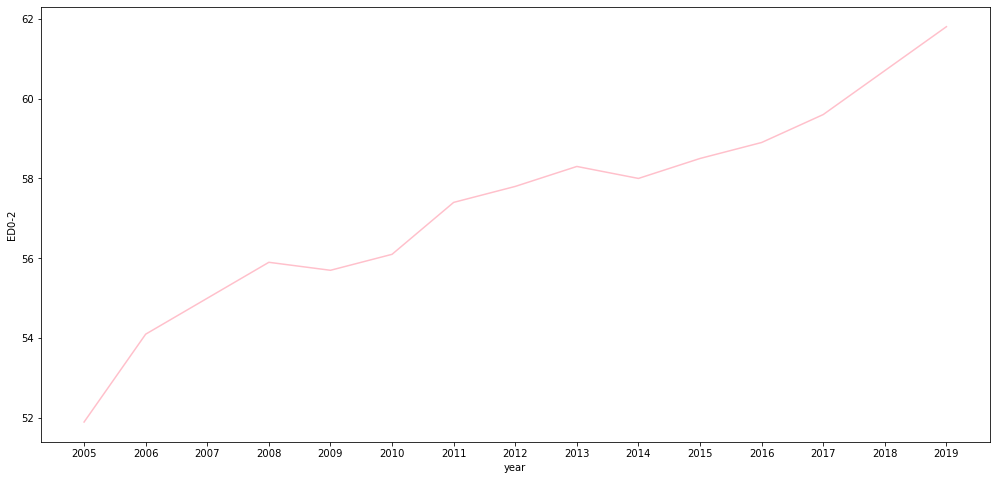

In [20]:
fig, ax = plt.subplots(figsize=(17,8))

sns.lineplot(data=df_germany,
             x="year",
             y="ED0-2",
             color="pink");

ED3_4: Upper secondary and post-secundary non-tertiary education (level 3-4)

In [21]:
ig, ax = plt.pyplot.subplots(figsize=(17,8))

sns.lineplot(data=df_germany,
             x="year",
             y="ED3_4",
             color="magenta");

AttributeError: module 'matplotlib.pyplot' has no attribute 'pyplot'

ED5-8: Tertiary education (level 5-8)

In [ ]:
fig, ax = plt.pyplot.subplots(figsize=(17,8))

sns.lineplot(data=df_germany,
             x="year",
             y="ED5-8",
             color="purple");

All 3 education levels in 1 plot

In [ ]:
fig, ax = plt.subplots(figsize=(17,8))

plt.title("Employment rate by education level in Germany ", fontsize=20)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
ax.plot("year", "ED0-2", data=df_germany, color='pink', linewidth=2, label="ED0-2")
ax.plot("year", "ED3_4", data=df_germany, color='magenta', linewidth=2, label="ED3_4")
ax.plot("year", "ED5-8", data=df_germany, color='purple', linewidth=2, label="ED5-8")
plt.legend()


### Findings
- People with a lower education level have the lowest employment rate, compared with medium and higher education. 
- The gap between lower education and the other levels is larger than between medium and higher education. 
- The employment rate of all three education levels is going up. It even looks like the gap between the medium and higher education levels are becoming smaller over time. 

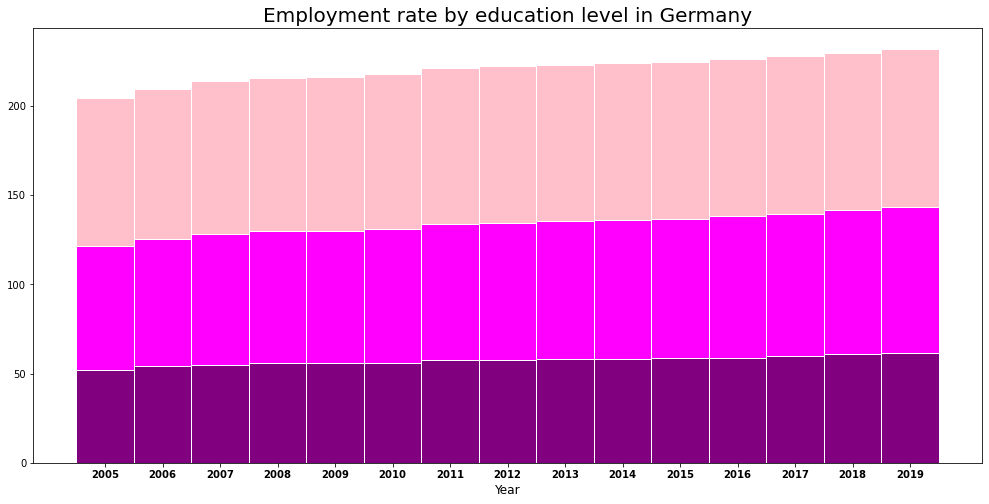

In [22]:
fig, ax = plt.subplots(figsize=(17,8))

# Values of each group
bars1 = df_germany["ED0-2"]
bars2 = df_germany["ED3_4"]
bars3 = df_germany["ED5-8"]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
 
# Names of group and bar width
names = ['2005','2006','2007','2008','2009', '2010', '2011', 
         '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
barWidth = 1
 
plt.title("Employment rate by education level in Germany", fontsize=20)
# Create brown bars
plt.bar(r, bars1, color='purple', edgecolor='white', width=barWidth)
# Create bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='magenta', edgecolor='white', width=barWidth)
# Create bars (top)
plt.bar(r, bars3, bottom=bars, color='pink', edgecolor='white', width=barWidth)
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Year",fontsize=12)
 
# Show graphic
plt.show()


Since we are mainly focused on unemployment rate, we decided to do 100 - employment rate for simplicity reasons. We are aware that in the real life this isn't such an easy calculation, and we are aware that this ignores various factors. 

In [23]:
df_germany['ED0-2low'] = (100 - df_germany["ED0-2"])
df_germany['ED3_4medium'] = (100 - df_germany["ED3_4"])
df_germany['ED5-8high'] = (100 - df_germany["ED5-8"])

In [24]:
df_germany

,year,ED0-2,ED3_4,ED5-8,ED0-2low,ED3_4medium,ED5-8high
0,2005,51.9,69.6,82.8,48.1,30.4,17.2
1,2006,54.1,71.4,84.2,45.9,28.6,15.8
2,2007,55.0,73.3,85.4,45.0,26.7,14.6
3,2008,55.9,74.2,85.7,44.1,25.8,14.3
4,2009,55.7,74.1,86.3,44.3,25.9,13.7
5,2010,56.1,74.9,86.8,43.9,25.1,13.2
6,2011,57.4,76.3,87.8,42.6,23.7,12.2
7,2012,57.8,76.8,87.7,42.2,23.2,12.3
8,2013,58.3,77.3,87.6,41.7,22.7,12.4
9,2014,58.0,78.1,87.7,42.0,21.9,12.3


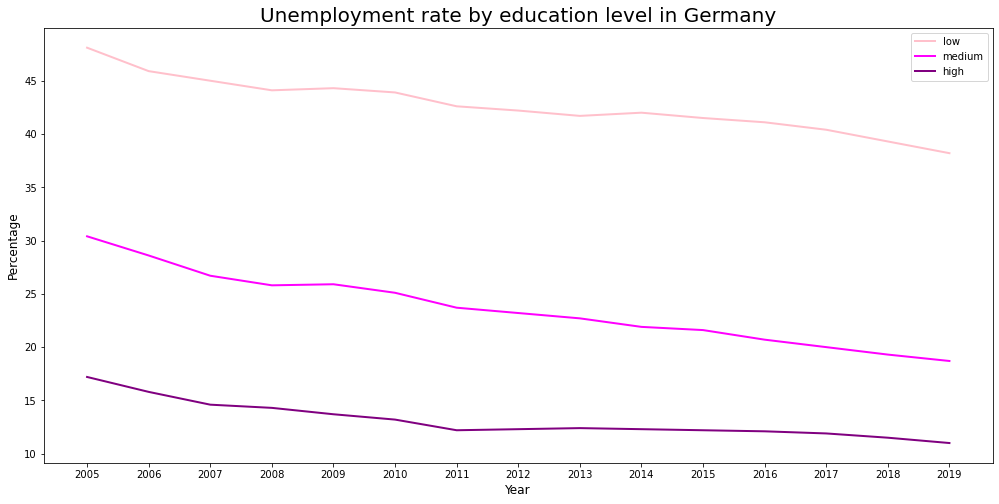

In [25]:
fig, ax = plt.subplots(figsize=(17,8))

plt.title("Unemployment rate by education level in Germany", fontsize=20)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
ax.plot("year", "ED0-2low", data=df_germany, color='pink', linewidth=2, label="low")
ax.plot("year", "ED3_4medium", data=df_germany, color='magenta', linewidth=2, label="medium")
ax.plot("year", "ED5-8high", data=df_germany, color='purple', linewidth=2, label="high")
plt.legend()


In [26]:
lvls = ["ED0-2low", "ED3_4medium", "ED5-8high"]
min_max = {lvl: (df_germany[lvl].min(), df_germany[lvl].max()) 
           for lvl in lvls}

for lvl in lvls:
    print("Level {}: min {}% - max {}%. Difference {} ppt."
          .format(lvl, 
                  min_max[lvl][0].round(2), 
                  min_max[lvl][1].round(2),
                  round(min_max[lvl][1]-min_max[lvl][0], 2)))

Level ED0-2low: min 38.2% - max 48.1%. Difference 9.9 ppt.
Level ED3_4medium: min 18.7% - max 30.4%. Difference 11.7 ppt.
Level ED5-8high: min 11.0% - max 17.2%. Difference 6.2 ppt.


### Findings
- The lowest unemployment rate is among people with higher education, the highest unemployment rate is among people with lower education. 
- People with higher education have a lower unemployment than other people with other education levels (roughly 30 percent points). 
- Overall the unemployment rate is decreasing over time.

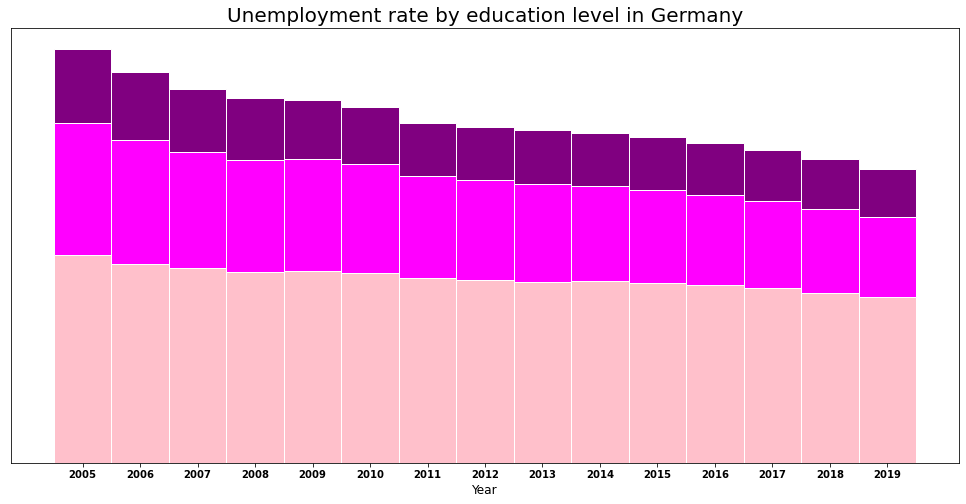

In [27]:
fig, ax = plt.subplots(figsize=(17,8))

# Values of each group
bars1 = df_germany["ED0-2low"]
bars2 = df_germany["ED3_4medium"]
bars3 = df_germany["ED5-8high"]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
 
# Names of group and bar width
names = ['2005','2006','2007','2008','2009', '2010', '2011', 
         '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
barWidth = 1
 
plt.title("Unemployment rate by education level in Germany", fontsize=20)
# Create brown bars
plt.bar(r, bars1, color='pink', edgecolor='white', width=barWidth)
# Create bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='magenta', edgecolor='white', width=barWidth)
# Create bars (top)
plt.bar(r, bars3, bottom=bars, color='purple', edgecolor='white', width=barWidth)
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Year",fontsize=12)

# Drop y axis
plt.ylabel("")
plt.yticks([])

# Show graphic
plt.show()


Actually after making this stacked bar chart we realized that we are stacking percentages, which is not possible. We dropped the y-axis here and won't include the graph in our presentation.

In [28]:
df_germany.to_pickle(os.path.join(BASE, 
                                  "output", 
                                  "education_employment_rate_germany.pkl"))